CREDIT CARD FRAUD DETECTION

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [2]:
df = pd.read_csv('fraudTest.csv')

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from time import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [4]:
print(df[df.duplicated() == True])
#as we can see here, we have no duplicated rows

print(df.isnull().sum())

Empty DataFrame
Columns: [Unnamed: 0, trans_date_trans_time, cc_num, merchant, category, amt, first, last, gender, street, city, state, zip, lat, long, city_pop, job, dob, trans_num, unix_time, merch_lat, merch_long, is_fraud]
Index: []

[0 rows x 23 columns]
Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


In [5]:
print(df.dtypes)

Unnamed: 0                 int64
trans_date_trans_time     object
cc_num                     int64
merchant                  object
category                  object
amt                      float64
first                     object
last                      object
gender                    object
street                    object
city                      object
state                     object
zip                        int64
lat                      float64
long                     float64
city_pop                   int64
job                       object
dob                       object
trans_num                 object
unix_time                  int64
merch_lat                float64
merch_long               float64
is_fraud                   int64
dtype: object


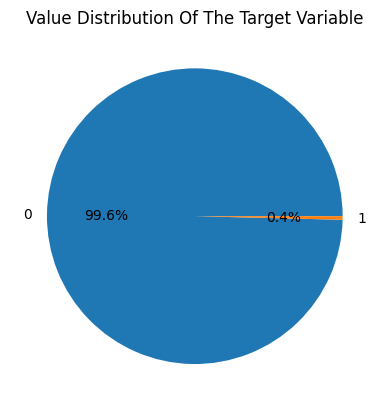

In [6]:
data = df['is_fraud'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Target Variable")
plt.show()

In [7]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [8]:
print('Summary statistics of non-fraudulent transactions:')
non_fraud_dataSet = df[df['is_fraud'] == 0]
non_fraud_dataSet.describe()

Summary statistics of non-fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,553574.000000,5.535740e+05,553574.000000,553574.000000,553574.000000,553574.000000,5.535740e+05,5.535740e+05,553574.000000,553574.000000,553574.0
mean,277997.725990,4.179643e+17,67.614408,48846.424285,38.541406,-90.230495,8.831369e+04,1.380683e+09,38.540954,-90.230474,0.0
std,160496.162903,1.309964e+18,152.471931,26855.813540,5.061194,13.720111,3.006593e+05,5.203038e+06,5.095755,13.731399,0.0
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.0
25%,139011.250000,1.800429e+14,9.600000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376031e+09,34.754055,-96.906402,0.0
50%,278009.500000,3.521417e+15,47.150000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380770e+09,39.374616,-87.443645,0.0
75%,417073.750000,4.642255e+15,82.620000,72042.000000,41.894800,-80.175200,1.968500e+04,1.385872e+09,41.953397,-80.265911,0.0
max,555718.000000,4.992346e+18,22768.110000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,0.0


In [9]:
print('Summary statistics of fraudulent transactions:')
fraud_dataSet = df[df['is_fraud'] == 1]
fraud_dataSet.describe()

Summary statistics of fraudulent transactions:


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2145.000000,2.145000e+03,2145.000000,2145.000000,2145.000000,2145.000000,2.145000e+03,2.145000e+03,2145.000000,2145.000000,2145.0
mean,242057.088112,3.854274e+17,528.356494,47862.900233,39.019971,-90.445556,6.452932e+04,1.379587e+09,39.018618,-90.465222,1.0
std,135455.280233,1.276313e+18,392.747594,26706.283776,5.076671,14.147521,2.192075e+05,4.546697e+06,5.093782,14.159252,0.0
min,1685.000000,6.048700e+10,1.780000,1257.000000,20.082700,-155.488000,2.300000e+01,1.371852e+09,19.161782,-156.480766,1.0
25%,131562.000000,3.056061e+13,214.510000,23937.000000,34.957200,-96.743000,1.131000e+03,1.375756e+09,35.017480,-96.697100,1.0
50%,245890.000000,2.358122e+15,371.940000,47987.000000,39.893600,-88.093500,2.870000e+03,1.379548e+09,39.744929,-88.040722,1.0
75%,346223.000000,4.335532e+15,907.770000,68031.000000,42.180800,-79.785600,1.233500e+04,1.383350e+09,42.208725,-79.909134,1.0
max,517571.000000,4.989848e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,1.387754e+09,56.214113,-66.960745,1.0


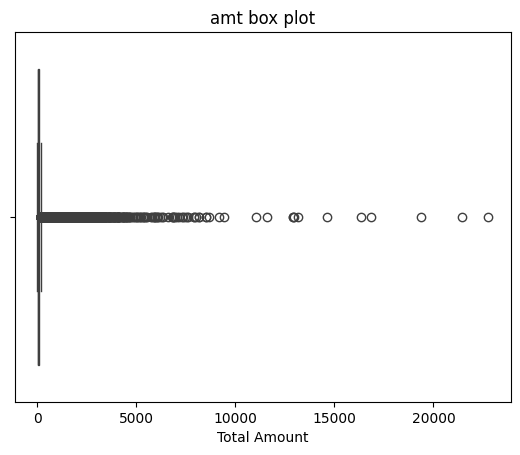

In [10]:
sns.boxplot(x = df['amt'])
plt.title('amt box plot')
plt.xlabel('Total Amount')
plt.show()

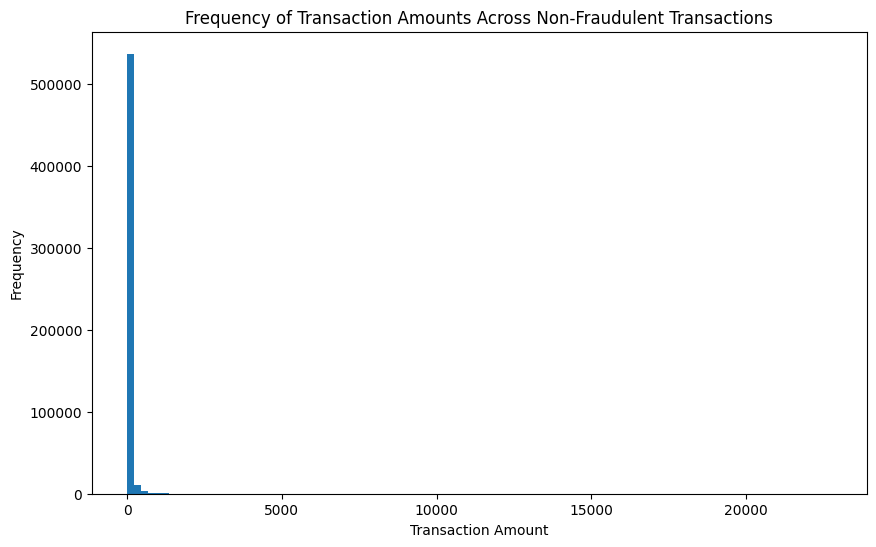

In [11]:
non_fraud_dataSet = df[df.is_fraud == 0]
data = non_fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Non-Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

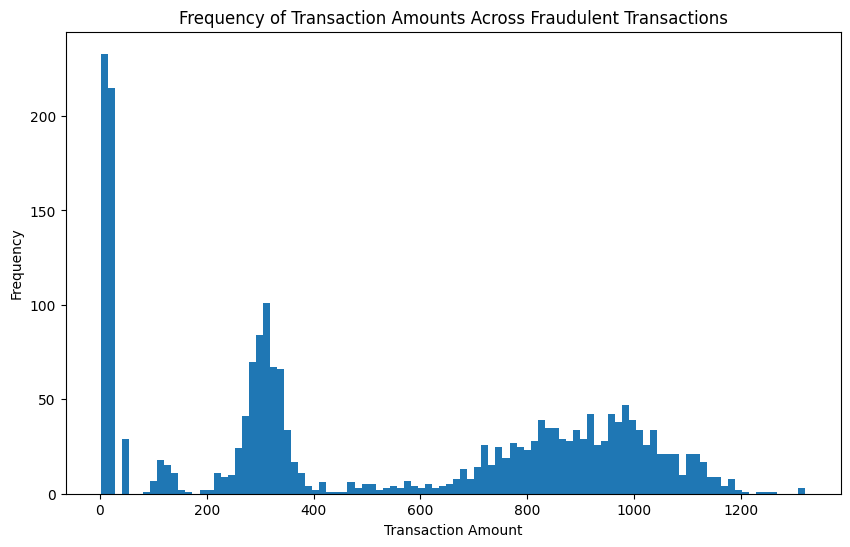

In [12]:
fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['amt']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Transaction Amounts Across Fraudulent Transactions')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

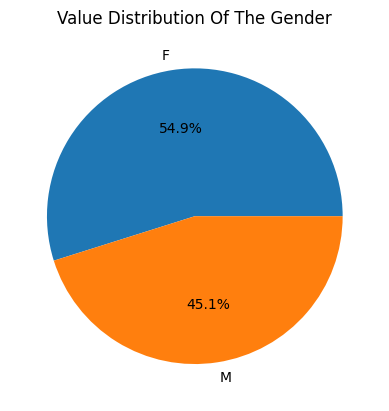

<Figure size 1000x600 with 0 Axes>

In [13]:
data = df['gender'].value_counts()

plt.pie(data, labels=data.index, autopct='%1.1f%%')
plt.title("Value Distribution Of The Gender")
plt.figure(figsize=(10, 6))
plt.show()


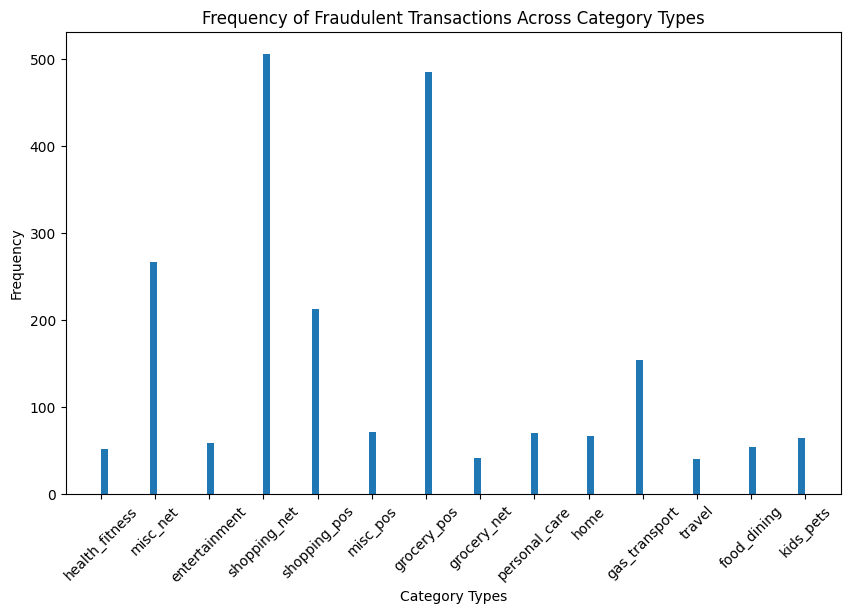

In [14]:
fraud_dataSet = df[df['is_fraud'] == 1]

data = fraud_dataSet['category']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Category Types')
plt.xlabel('Category Types')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()


In [15]:
#Feature Selection/Extraction: 

df['trans_date_trans_time']= df['trans_date_trans_time'].str[10:13]
#taking only the hour time from this format: 'M/D/YYYY  HH:MM:SS AM/PM'

df = df.rename(columns={'trans_date_trans_time': 'trans_hour'})

print(df['trans_hour'].unique()) 

[' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23'
 ' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11']


In [16]:
df = df.drop(columns=['cc_num', 'merchant', 'first', 'last', 'street', 'city', 'state', 'zip', 'city_pop','job', 'trans_num', 'unix_time' ]) 

In [17]:
df['lat'] = abs(df['lat'] - df['merch_lat'])
df['long'] = abs(df['long'] - df['merch_long'])

df = df.rename(columns = {'long': 'long_distance', 'lat': 'lat_distance'})

df = df.drop(columns=['merch_lat'])
df = df.drop(columns=['merch_long'])

In [18]:
df['dob'] = df['dob'].str[0:4] 
#taking only the birth year from this format: 'M/D/YYYY' so we can get the age of the card holder

df['dob'] = df['dob'].astype(int) 
#turning the column to integer values so we can get the age(performing a column type transformation)

df['dob'] = 2020 - df['dob'] #because the dataset has transacions up until no more than 2020
df = df.rename(columns={'dob': 'age'})

In [19]:
#Printing entire the dataframe after feature Selection/Extraction:
print(df.head())

   Unnamed: 0 trans_hour        category    amt gender  lat_distance  \
0           0         12   personal_care   2.86      M      0.020491   
1           1         12   personal_care  29.84      F      0.870202   
2           2         12  health_fitness  41.28      F      0.177090   
3           3         12        misc_pos  60.05      M      0.242698   
4           4         12          travel   3.19      M      0.706248   

   long_distance  age  is_fraud  
0       0.265214   52         0  
1       0.475569   30         0  
2       0.659611   50         0  
3       0.063961   33         0  
4       0.867734   65         0  


In [20]:
print('number of different hours: ', len(df['trans_hour'].unique()), '==>',df['trans_hour'].unique() )
#Now we can use label encoding on the trans_hour column

le=LabelEncoder()
df['trans_hour'] = le.fit_transform(df['trans_hour'])

number of different hours:  24 ==> [' 12' ' 13' ' 14' ' 15' ' 16' ' 17' ' 18' ' 19' ' 20' ' 21' ' 22' ' 23'
 ' 00' ' 01' ' 02' ' 03' ' 04' ' 05' ' 06' ' 07' ' 08' ' 09' ' 10' ' 11']


In [21]:
print('number of different categories: ', len(df['category'].unique()))
#Performing binary encoding on the 'category' column
encoder = ce.BinaryEncoder(cols=['category'])

df_binary=encoder.fit_transform(df['category'])

df = pd.concat([df, df_binary], axis=1) #this line is to add the new encoded columns inside the dataframe

df = df.drop(columns=['category'])#dropping the main category column after adding the new encoded columns inside df

number of different categories:  14


In [22]:
print('number of different genders: ', len(df['gender'].unique()), '==>', df['gender'].unique() )
#Now we can use one hot encoding on the gender column 

df = pd.get_dummies(df, columns=['gender'], prefix = 'gender')

number of different genders:  2 ==> ['M' 'F']


In [23]:
print(df.dtypes)
print(df.head())

Unnamed: 0         int64
trans_hour         int32
amt              float64
lat_distance     float64
long_distance    float64
age                int32
is_fraud           int64
category_0         int64
category_1         int64
category_2         int64
category_3         int64
gender_F            bool
gender_M            bool
dtype: object
   Unnamed: 0  trans_hour    amt  lat_distance  long_distance  age  is_fraud  \
0           0          12   2.86      0.020491       0.265214   52         0   
1           1          12  29.84      0.870202       0.475569   30         0   
2           2          12  41.28      0.177090       0.659611   50         0   
3           3          12  60.05      0.242698       0.063961   33         0   
4           4          12   3.19      0.706248       0.867734   65         0   

   category_0  category_1  category_2  category_3  gender_F  gender_M  
0           0           0           0           1     False      True  
1           0           0           

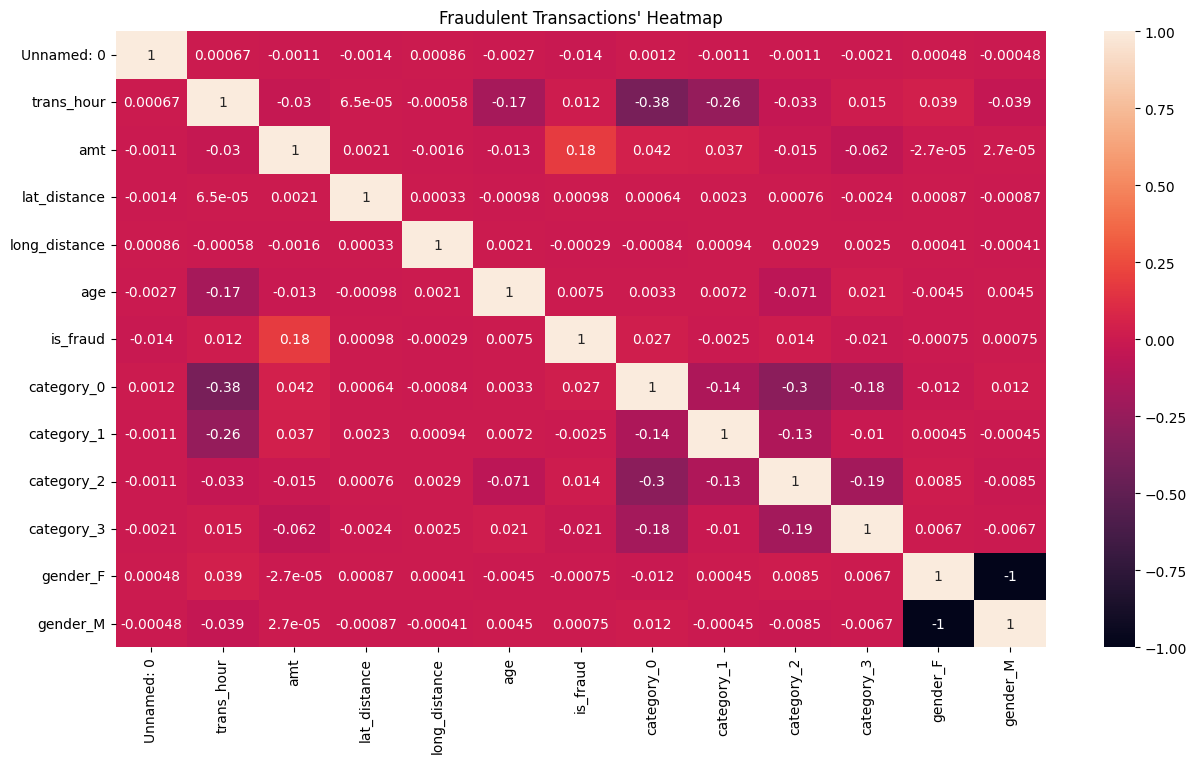

In [24]:
df_test = df.corr() 
plt.figure(figsize=(15, 8))
sns.heatmap(df_test, annot=True)
plt.title("Fraudulent Transactions' Heatmap")
plt.show()

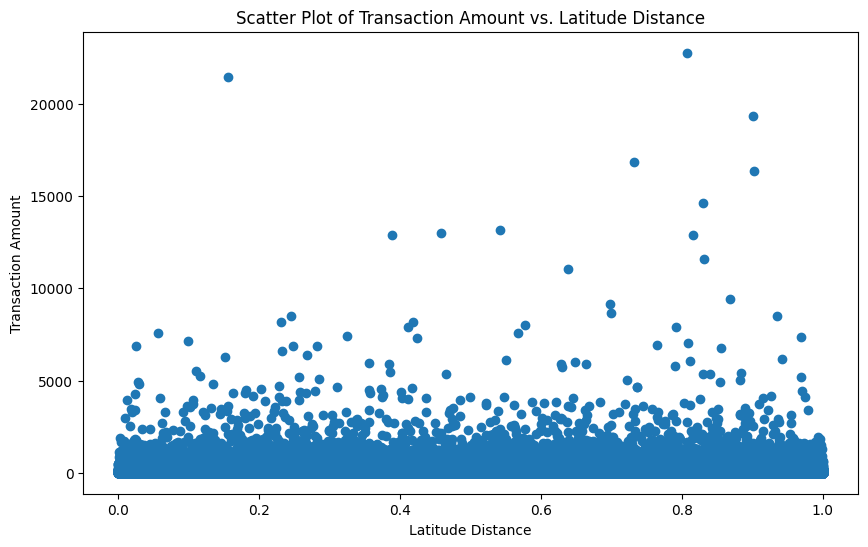

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['lat_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Latitude Distance')
plt.xlabel('Latitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

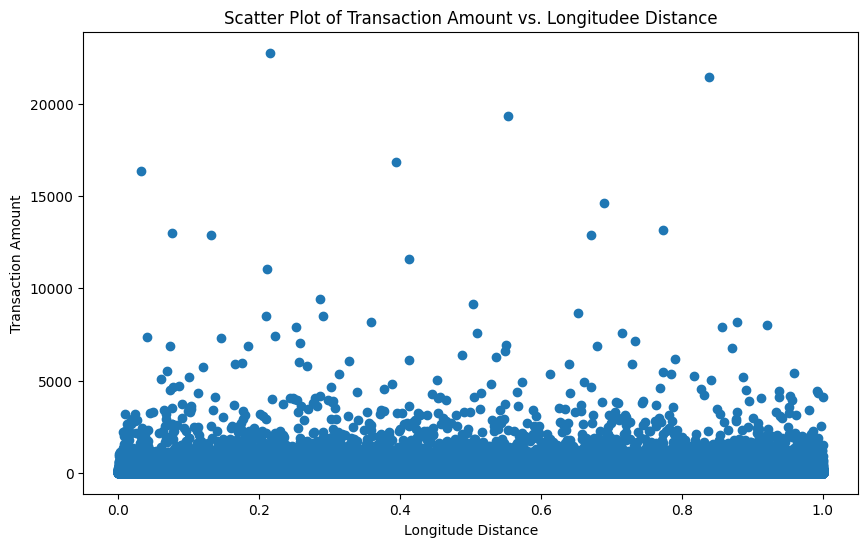

In [26]:
plt.figure(figsize=(10, 6))
plt.scatter(df['long_distance'], df['amt'])
plt.title('Scatter Plot of Transaction Amount vs. Longitudee Distance')
plt.xlabel('Longitude Distance')
plt.ylabel('Transaction Amount')
plt.show()

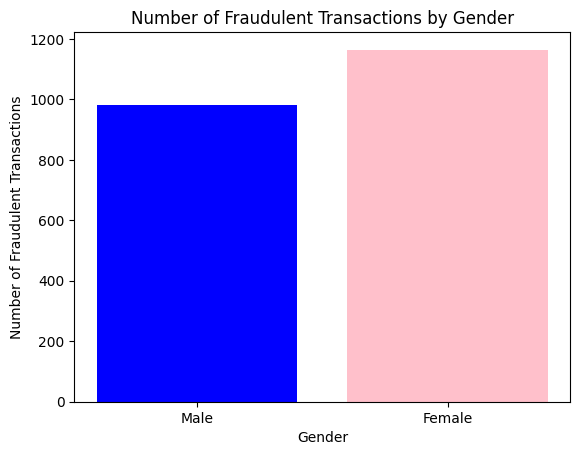

In [27]:
maleFraud = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]
maleFraud_count = df[(df['gender_M'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

femaleFraud = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]
femaleFraud_count = df[(df['gender_F'] == 1) & (df['is_fraud'] == 1)]['is_fraud'].sum()

gender = ['Male', 'Female']
fraud_counts = [maleFraud_count, femaleFraud_count]

plt.bar(gender, fraud_counts, color=['blue', 'pink'])
plt.title('Number of Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Fraudulent Transactions')
plt.show()

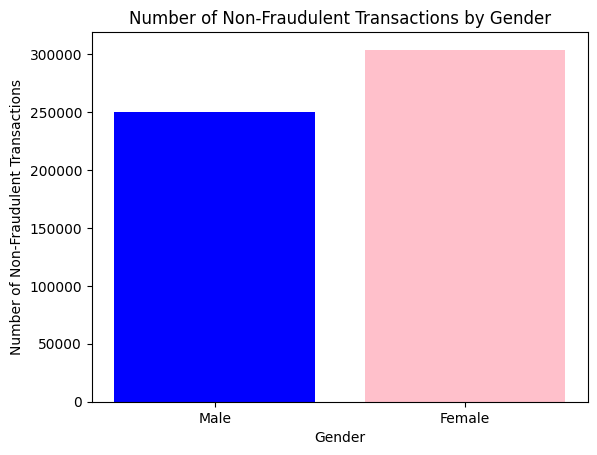

In [28]:
non_fraudulent_transactions = df[df['is_fraud'] == 0]

male_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_M'] == 1]['is_fraud'].count()
female_non_fraud_count = non_fraudulent_transactions[non_fraudulent_transactions['gender_F'] == 1]['is_fraud'].count()

gender = ['Male', 'Female']
non_fraud_counts = [male_non_fraud_count, female_non_fraud_count]

plt.bar(gender, non_fraud_counts, color=['blue', 'pink'])
plt.title('Number of Non-Fraudulent Transactions by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.show()

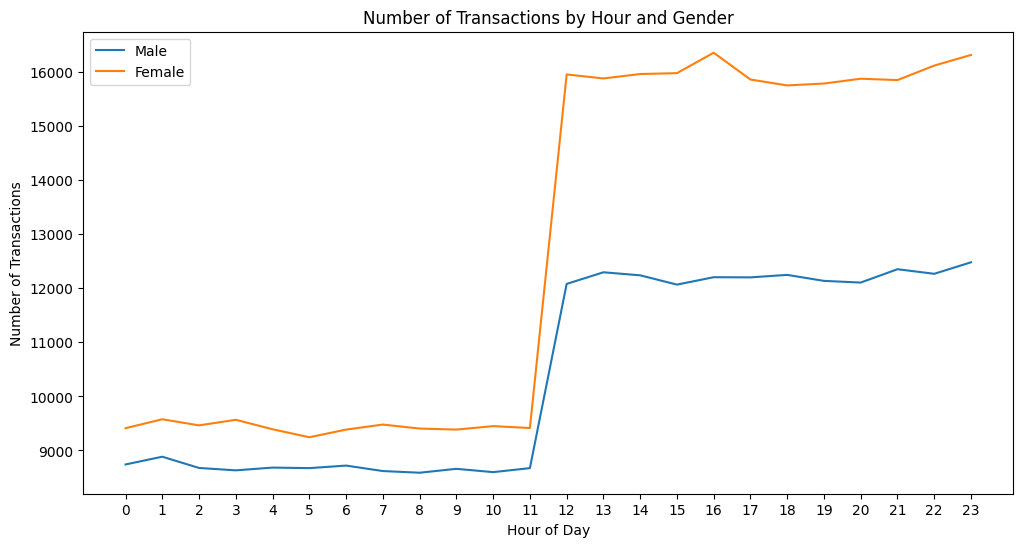

In [29]:
hourly_transactions_male = df[df['gender_M'] == 1].groupby('trans_hour').size()
hourly_transactions_female = df[df['gender_F'] == 1].groupby('trans_hour').size()


plt.figure(figsize=(12, 6))
plt.plot(hourly_transactions_male.index, hourly_transactions_male.values, label='Male')
plt.plot(hourly_transactions_female.index, hourly_transactions_female.values, label='Female')


plt.title('Number of Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(range(0, 24))  # because we have a 24hr format

plt.legend() #added on the top left, for making visualization easier

plt.show()

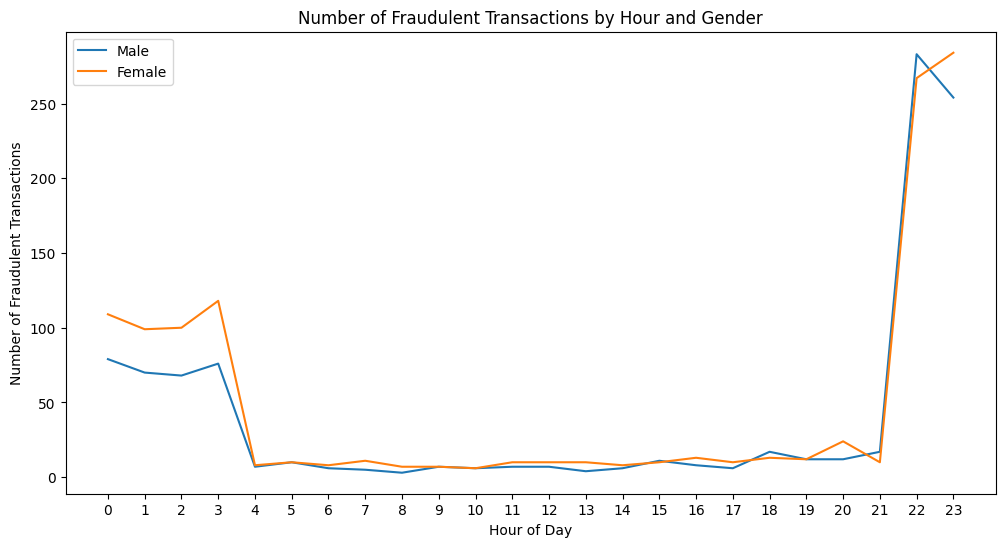

In [30]:
fraud_df = df[df['is_fraud'] == 1]

hourly_fraud_male = fraud_df[fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_fraud_female = fraud_df[fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_fraud_male.index, hourly_fraud_male.values, label='Male')
plt.plot(hourly_fraud_female.index, hourly_fraud_female.values, label='Female')

plt.title('Number of Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(0, 24))  # because we have a 24 hr format
plt.legend()

plt.show()

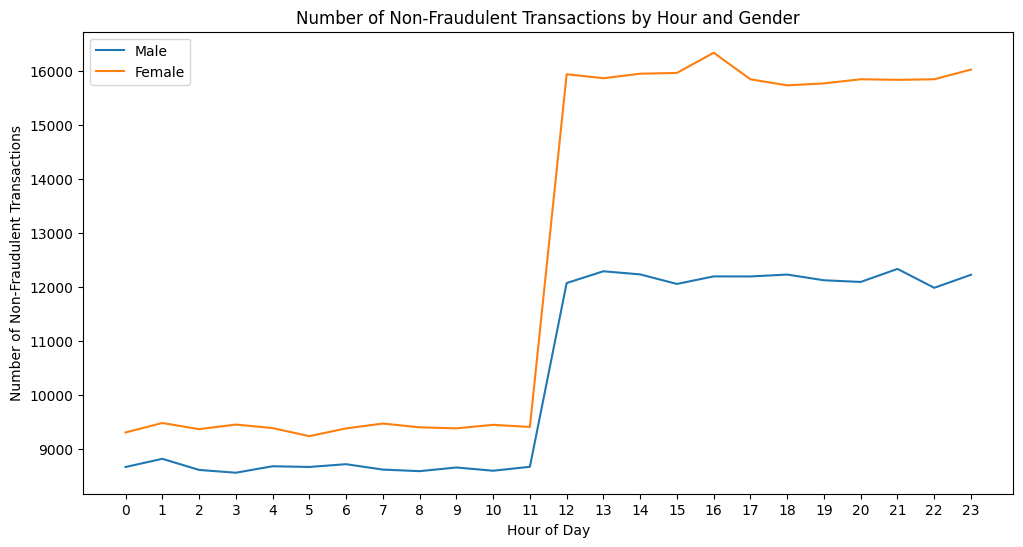

In [31]:
non_fraud_df = df[df['is_fraud'] == 0]

hourly_non_fraud_male = non_fraud_df[non_fraud_df['gender_M'] == 1].groupby('trans_hour').size()
hourly_non_fraud_female = non_fraud_df[non_fraud_df['gender_F'] == 1].groupby('trans_hour').size()

plt.figure(figsize=(12, 6))
plt.plot(hourly_non_fraud_male.index, hourly_non_fraud_male.values, label='Male')
plt.plot(hourly_non_fraud_female.index, hourly_non_fraud_female.values, label='Female')

plt.title('Number of Non-Fraudulent Transactions by Hour and Gender')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Non-Fraudulent Transactions')
plt.xticks(range(0, 24))  #because we have a 24 hour format
plt.legend()

plt.show()

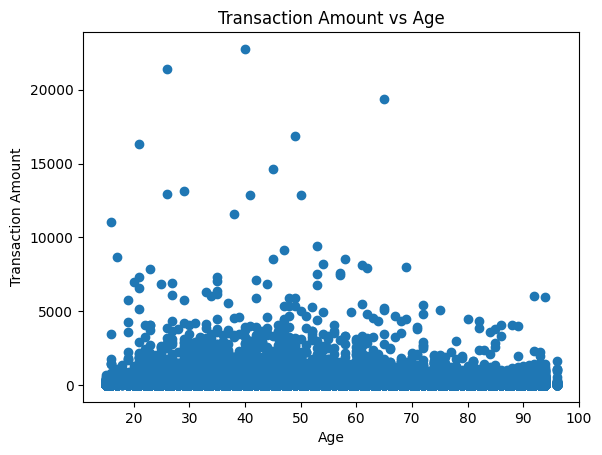

In [32]:
plt.scatter(df['age'], df['amt'])
plt.title('Transaction Amount vs Age')
plt.xlabel('Age')
plt.ylabel('Transaction Amount')
plt.show()

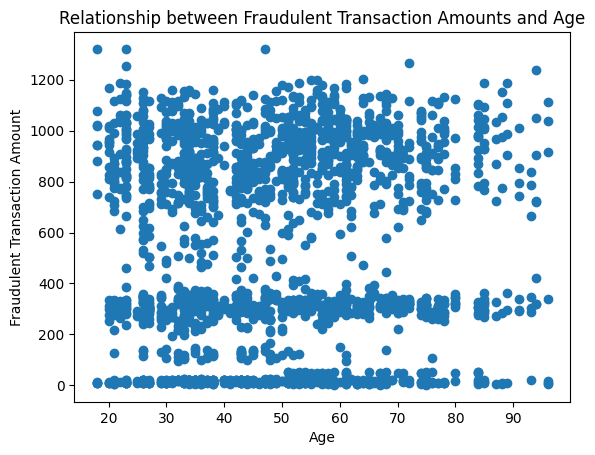

In [33]:
fraudulent_transactions = df[df['is_fraud'] == 1]

plt.scatter(fraudulent_transactions['age'], fraudulent_transactions['amt'])
plt.title('Relationship between Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Fraudulent Transaction Amount')
plt.show() 

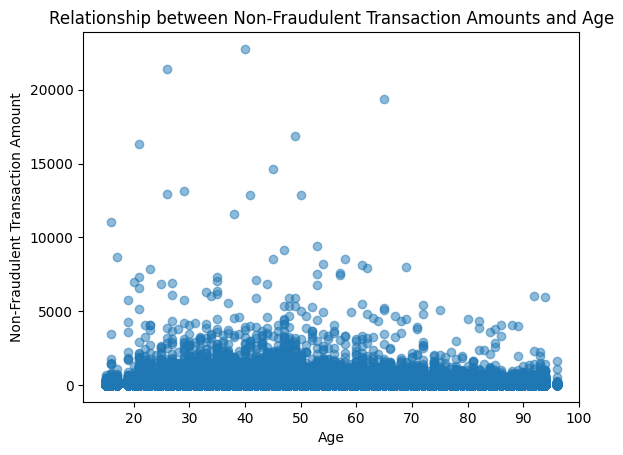

In [34]:
non_fraudulent_transactions = df[df['is_fraud'] == 0]

plt.scatter(non_fraudulent_transactions['age'], non_fraudulent_transactions['amt'], alpha=0.5)
plt.title('Relationship between Non-Fraudulent Transaction Amounts and Age')
plt.xlabel('Age')
plt.ylabel('Non-Fraudulent Transaction Amount')
plt.show()

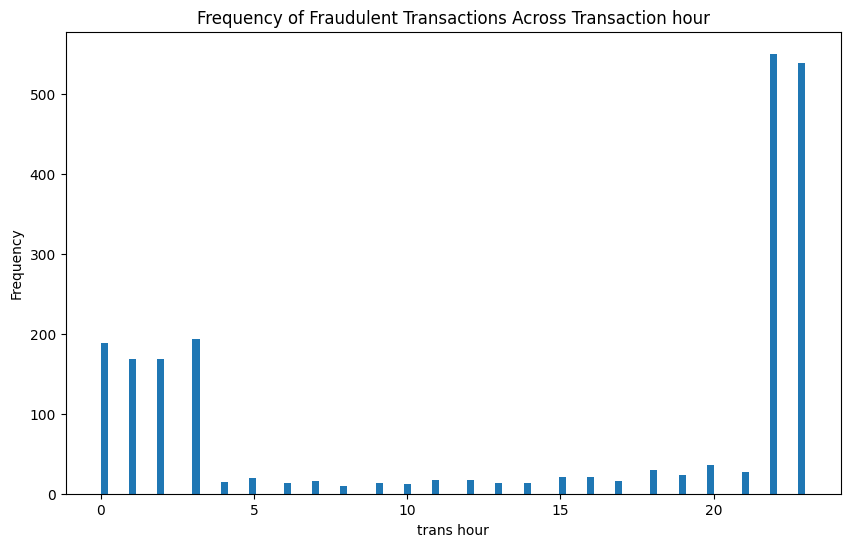

In [35]:
fraud_dataSet = df[df['is_fraud'] == 1]
data = fraud_dataSet['trans_hour']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Transaction hour')
plt.xlabel('trans hour')
plt.ylabel('Frequency')
plt.show()

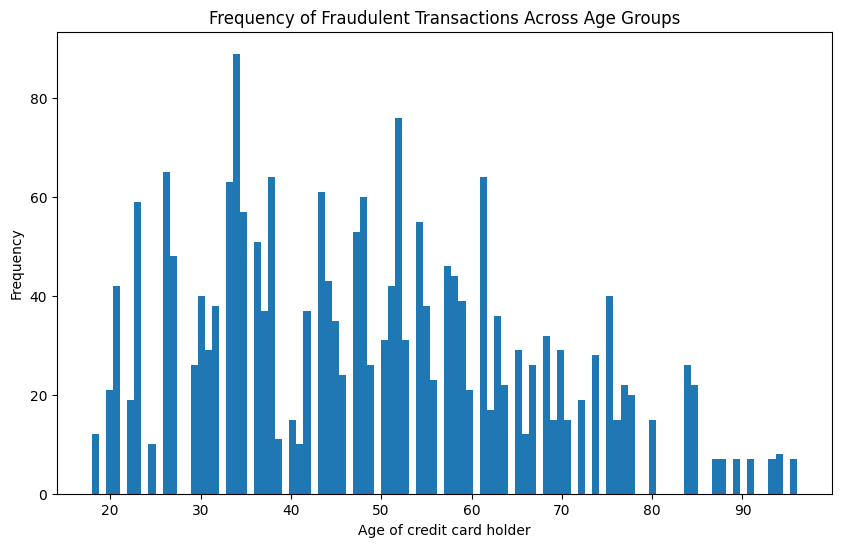

In [36]:
fraud_dataSet = df[df.is_fraud == 1]
data = fraud_dataSet['age']
plt.figure(figsize=(10, 6))
plt.hist(data, bins = 100)
plt.title('Frequency of Fraudulent Transactions Across Age Groups')
plt.xlabel('Age of credit card holder')
plt.ylabel('Frequency')
plt.show()

In [37]:
def Plot_Auc_Roc_Curve(X_test, y_test):
    """This function is for Visualizing the AUC-ROC curve"""
    # Calculate ROC curve and AUC
    probs = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(10, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc="lower right")
    plt.show()

In [38]:
def calculate_evaluation_metrics(y_true, y_pred):
    """This function is for calculating our evaluation metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    auc_roc = roc_auc_score(y_true, y_pred)
    
    return accuracy, precision, recall, f1, auc_roc

In [39]:
def print_evaluation_metrics(accuracy, precision, recall, f1, auc_roc):
    """This function is for printing the values of all our evaluation metrics"""
    print('Test Accuracy:', accuracy)
    print('Test Precision:', precision)
    print('Test Recall:', recall)
    print('Test F1 Score:', f1)
    print('Test AUC ROC:', auc_roc)

In [40]:
def evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc):
    
    """This function is for putting all the evaluation metrics on a chart after training each model"""
    #Evaluation metrics and their corresponding values
    metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "AUC ROC"]
    values = [test_accuracy, test_precision, test_recall, test_f1, test_auc_roc]

    # Create a vertical bar chart
    plt.figure(figsize=(8, 6))
    plt.bar(metrics, values, color='skyblue')
    plt.ylabel('Values')
    plt.xlabel('Evaluation Metrics')
    plt.title('Model Evaluation Metrics')

    # Display the values on top of the bars
    for i, value in enumerate(values):
        plt.text(i, value + 0.01, f'{value:.4f}', ha='center', va='bottom', fontsize=12)

    plt.xticks(rotation=45)  # Rotate the metric names for better readability

    plt.tight_layout()
    plt.show()

In [41]:
def show_confusion_matrix(y_test, y_test_pred):
    cm = confusion_matrix(y_test, y_test_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [42]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9959452002207346
Test Precision: 0.4980682009071057
Test Recall: 0.4999036562454839
Test F1 Score: 0.49898424070490094
Test AUC ROC: 0.4999036562454839
time:  2.2781903743743896


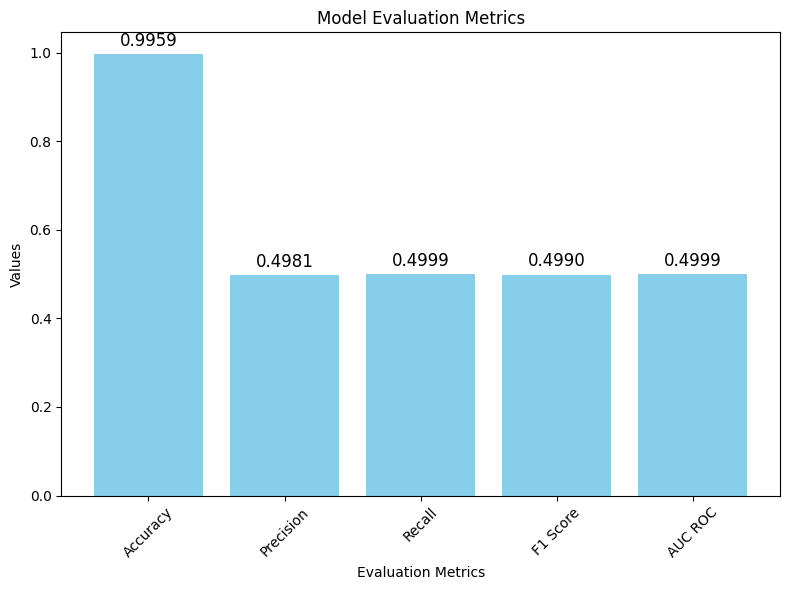

In [43]:
#The comparison of the evaluation metrics for logistic regression on the full dataset.
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

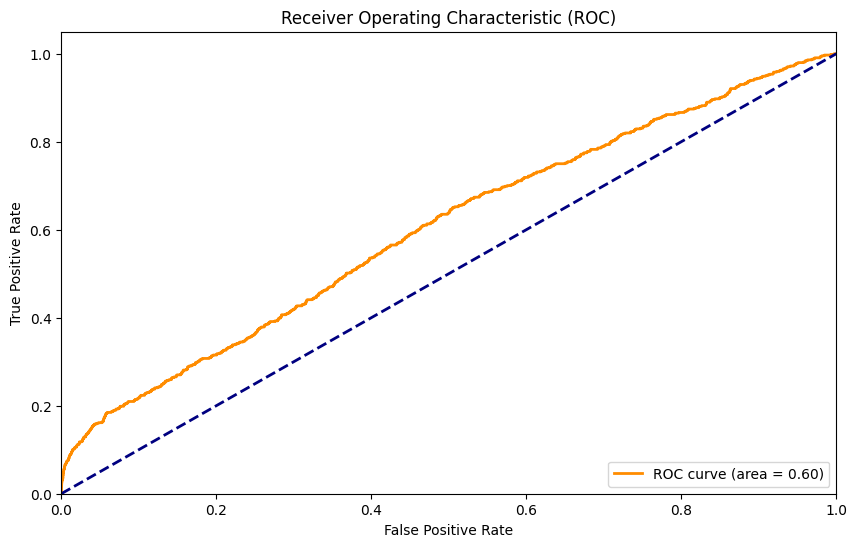

In [44]:
#The AUC ROC curve of logistic regression on the full dataset.
Plot_Auc_Roc_Curve(X_test, y_test)

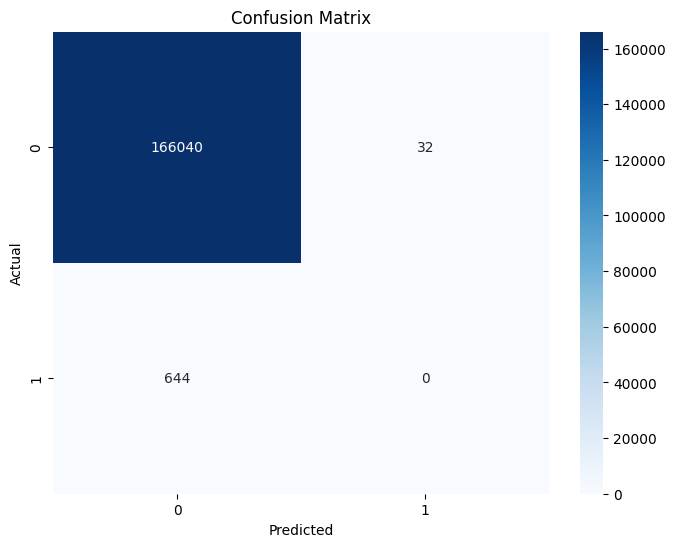

In [45]:
show_confusion_matrix(y_test, y_test_pred)

In [46]:
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]
# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42) #test_size=0.2, random_state=2
model = LogisticRegression()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.8888121546961326
Test Precision: 0.8980488361478777
Test Recall: 0.7694030427060005
Test F1 Score: 0.8107426181437956
Test AUC ROC: 0.7694030427060005
time:  0.02966928482055664


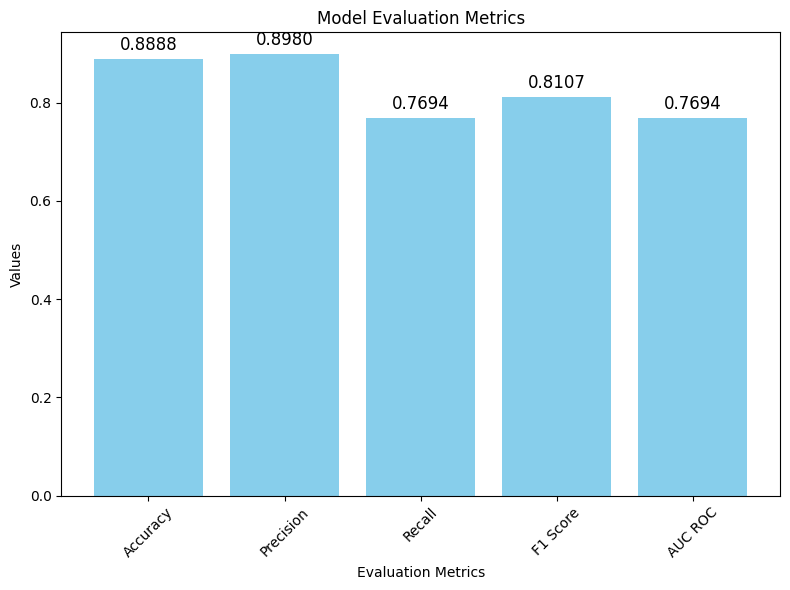

In [47]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

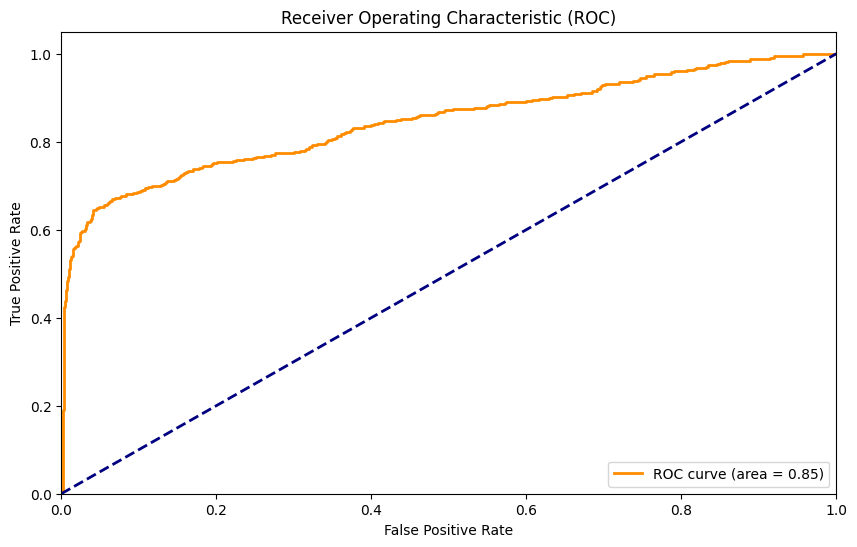

In [48]:
Plot_Auc_Roc_Curve(X_test, y_test)

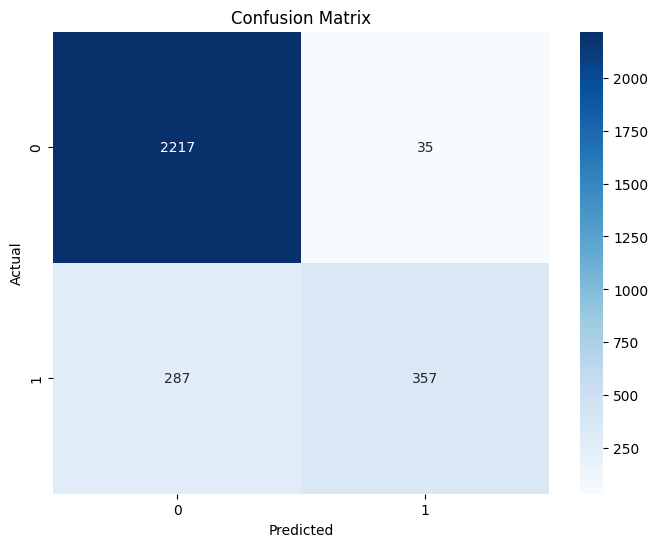

In [49]:
show_confusion_matrix(y_test, y_test_pred)

In [50]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9969349072674488
Test Precision: 0.8614199601398902
Test Recall: 0.6659051981943624
Test F1 Score: 0.7271335861989224
Test AUC ROC: 0.6659051981943624
time:  0.9744882583618164


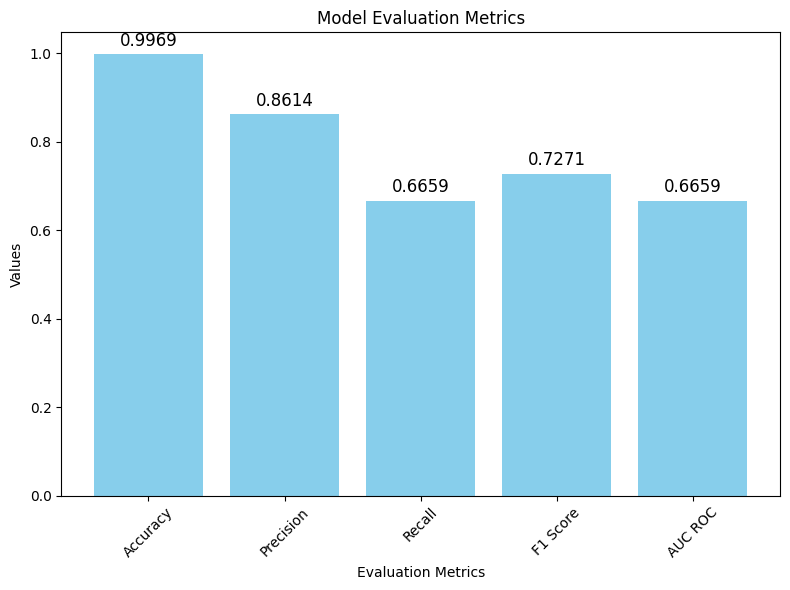

In [51]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

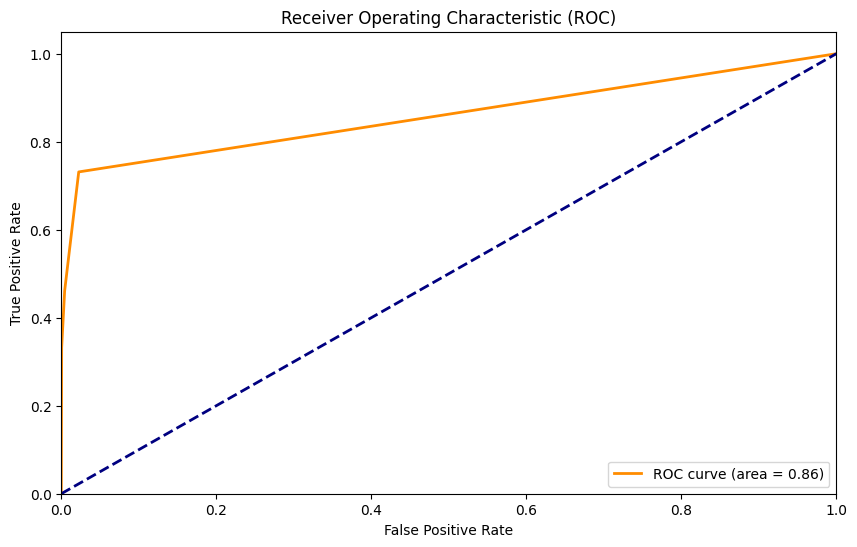

In [52]:
Plot_Auc_Roc_Curve(X_test, y_test)

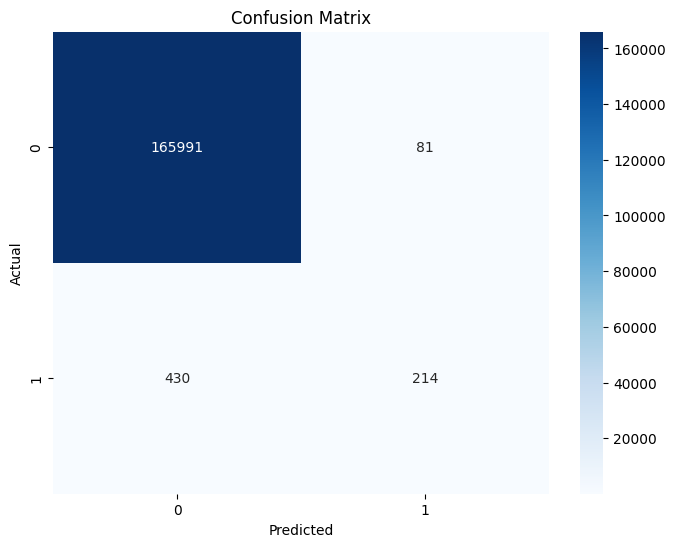

In [53]:
show_confusion_matrix(y_test, y_test_pred)

In [54]:
#Decision tree on the split dataset (7.5k fraud and 7.5k random non-fraud): 
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506)

new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=42)
model = tree.DecisionTreeClassifier(min_samples_split=2, max_depth=2, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9195441988950276
Test Precision: 0.9047801401580419
Test Recall: 0.8545792284015312
Test F1 Score: 0.8762449226925085
Test AUC ROC: 0.8545792284015313
time:  0.015631914138793945


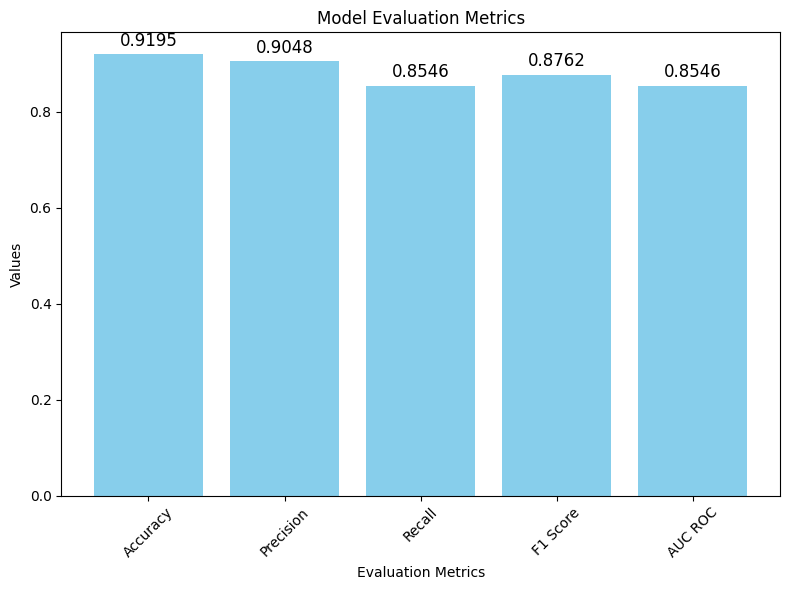

In [55]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

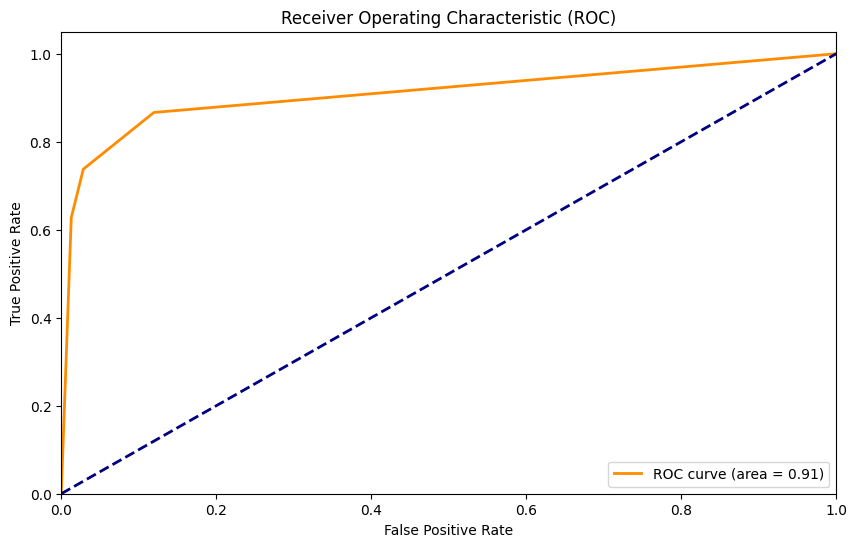

In [56]:
Plot_Auc_Roc_Curve(X_test, y_test)

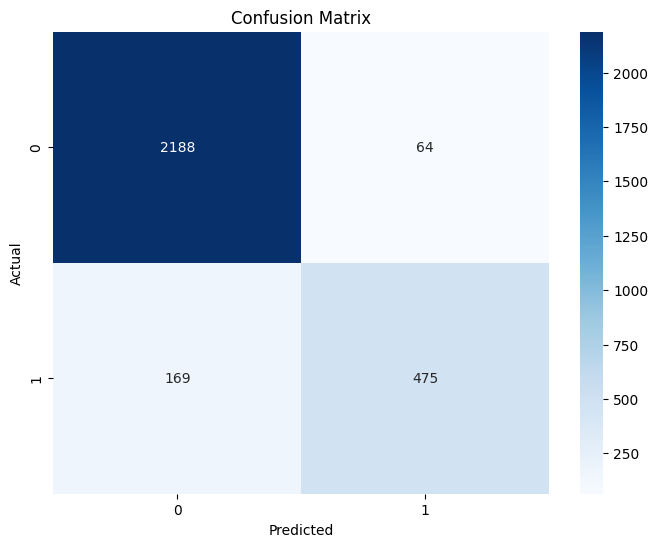

In [57]:
show_confusion_matrix(y_test, y_test_pred)

In [58]:
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model: 
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time - Start_Time)

Test Accuracy: 0.9988483408910962
Test Precision: 0.9848812832358815
Test Recall: 0.861759091843424
Test F1 Score: 0.9143018587095615
Test AUC ROC: 0.861759091843424
time:  224.63224053382874


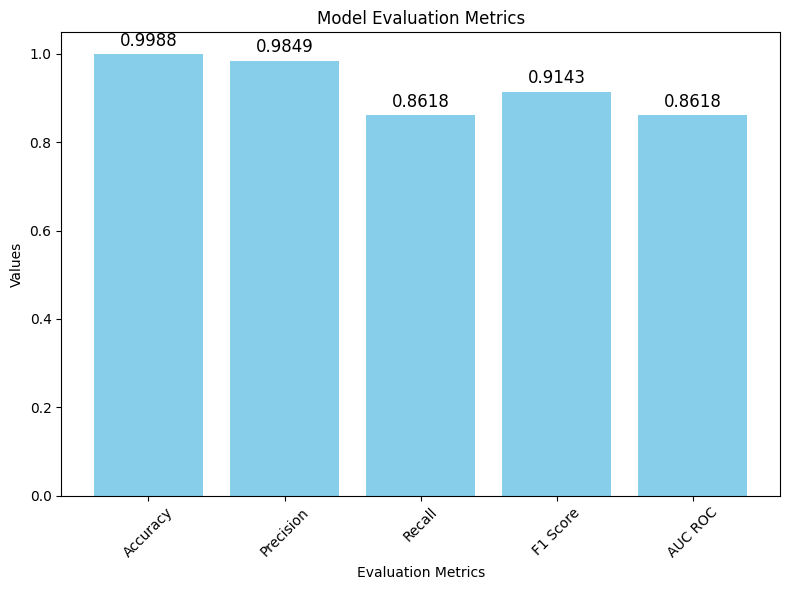

In [59]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

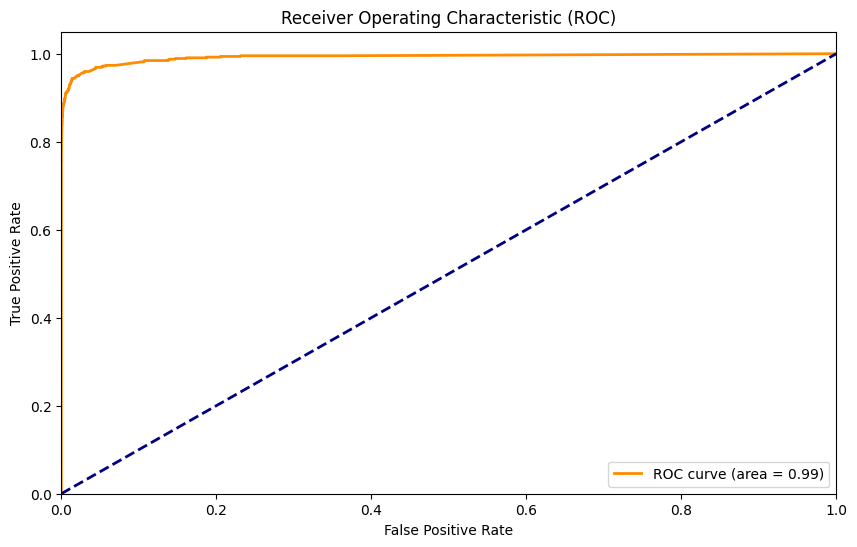

In [60]:
Plot_Auc_Roc_Curve(X_test, y_test)

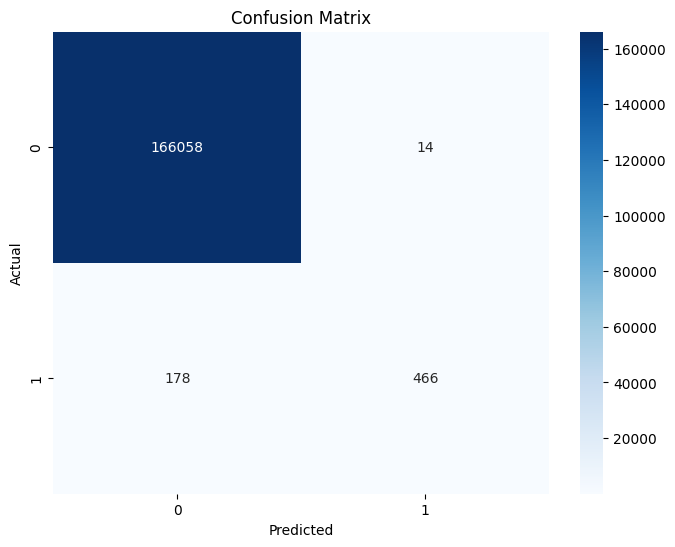

In [61]:
show_confusion_matrix(y_test, y_test_pred)

In [62]:
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = RandomForestClassifier(n_estimators=300, max_depth=20,min_samples_split=2, min_samples_leaf= 1, random_state=42)
#The best parametes here were found by hyperparameter tuning which is below the random forest model: 
model.fit(X_train,y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.976864640883978
Test Precision: 0.9751474606682018
Test Recall: 0.9574057014882562
Test F1 Score: 0.9659230391636013
Test AUC ROC: 0.9574057014882562
time:  2.8278861045837402


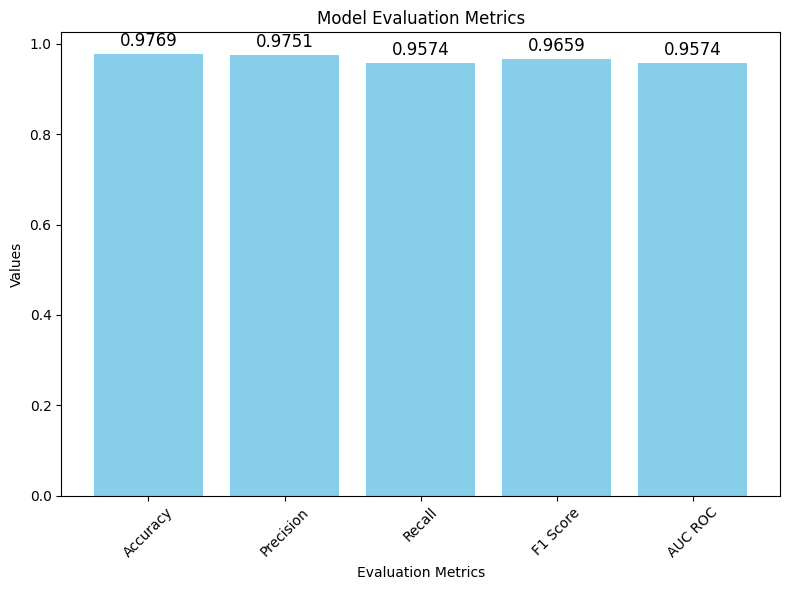

In [63]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

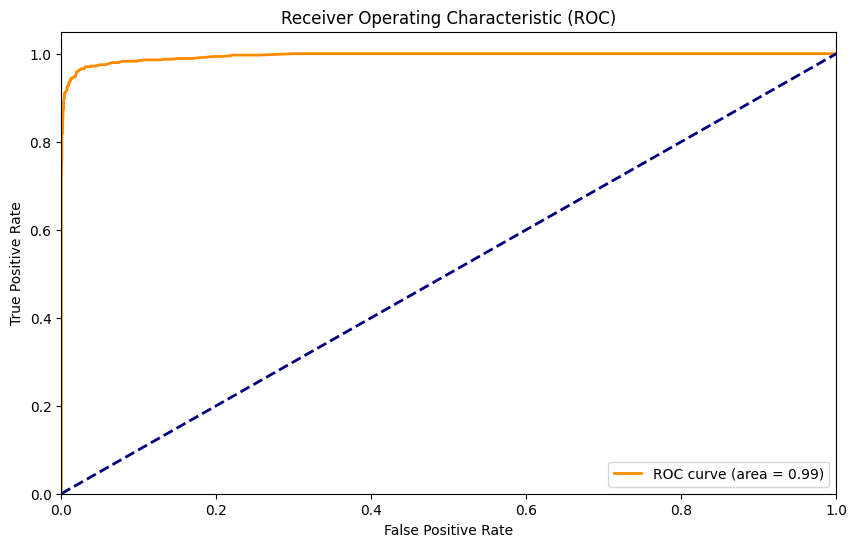

In [64]:
Plot_Auc_Roc_Curve(X_test, y_test)

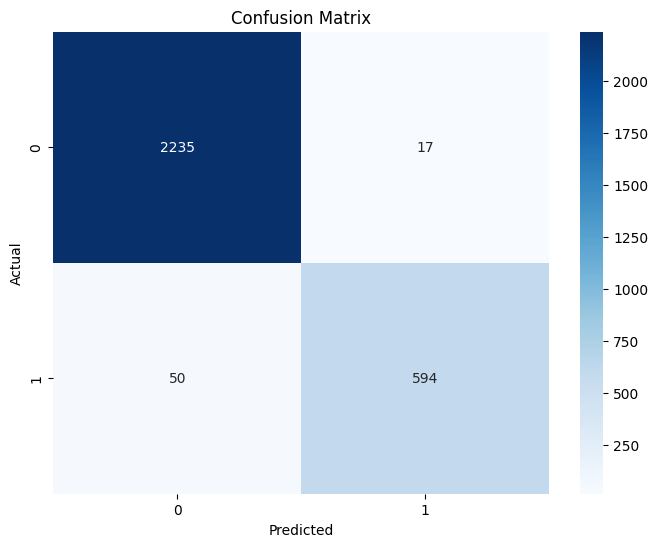

In [65]:
show_confusion_matrix(y_test, y_test_pred)

In [66]:
Start_Time = time()

param_grid = {
'n_estimators': [1,10, 100, 200, 300],
 'max_depth': [2, 4, 10, 20, 30],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': range(1,10)
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)
best_rf = grid_search.best_estimator_
# Check performance on the test set

End_Time = time()

accuracy = best_rf.score(X_test, y_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test set accuracy of the best model: {accuracy}")
print('time: ', End_Time-Start_Time)


Fitting 3 folds for each of 675 candidates, totalling 2025 fits
Best parameters found:  {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy found:  0.96994836056023
Test set accuracy of the best model: 0.976864640883978
time:  210.57475662231445


In [67]:
#KNN on the full dataset here:

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.9965090333261355
Test Precision: 0.7906054167136489
Test Recall: 0.6672382090354285
Test F1 Score: 0.7121423476202933
Test AUC ROC: 0.6672382090354285
time:  7.5436437129974365


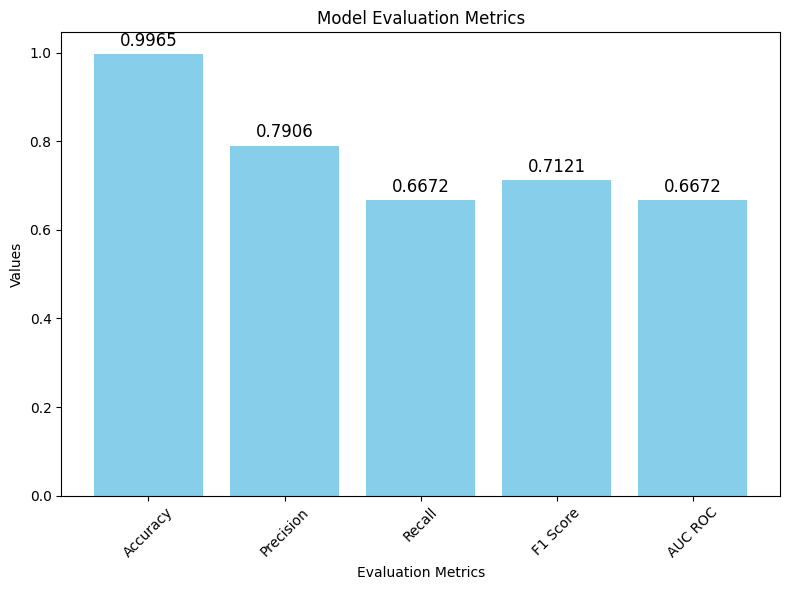

In [68]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

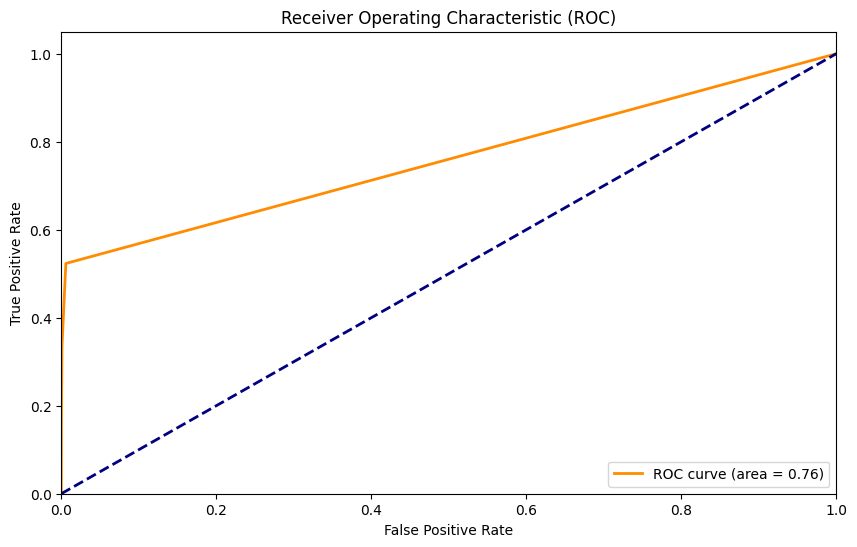

In [69]:
Plot_Auc_Roc_Curve(X_test, y_test)

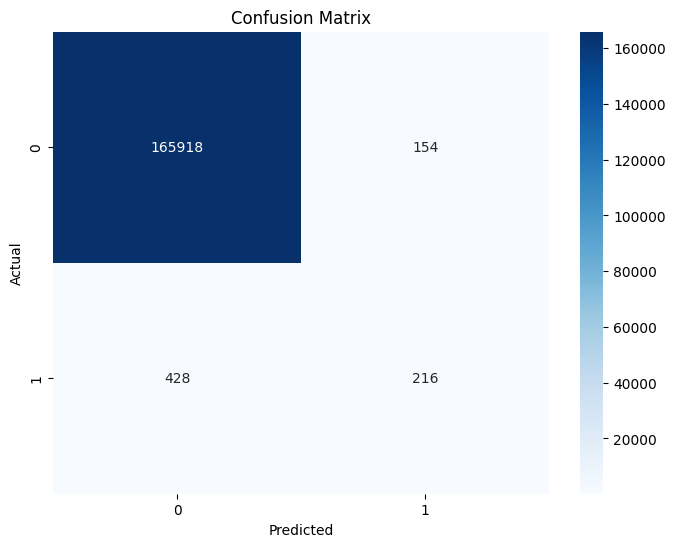

In [70]:
show_confusion_matrix(y_test, y_test_pred)

In [71]:
#KNN on the split dataset (7.5k fraud and 7.5k random non-fraud): 
fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)

X = new_dataset.drop(columns='is_fraud',axis=1)
y = new_dataset['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model=KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

#Calculate evaluation metrics for test data
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.8781077348066298
Test Precision: 0.845568253511227
Test Recall: 0.7813689418929206
Test F1 Score: 0.8065934564896385
Test AUC ROC: 0.7813689418929206
time:  0.1241755485534668


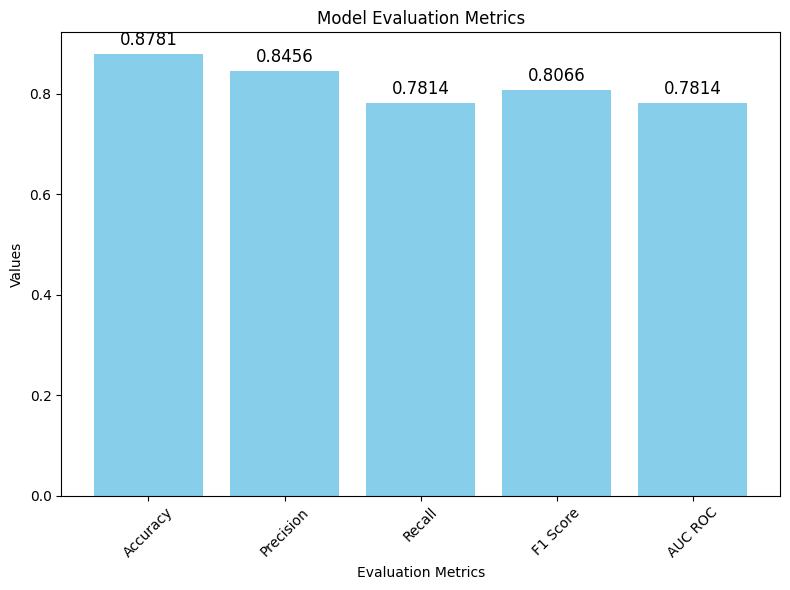

In [72]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

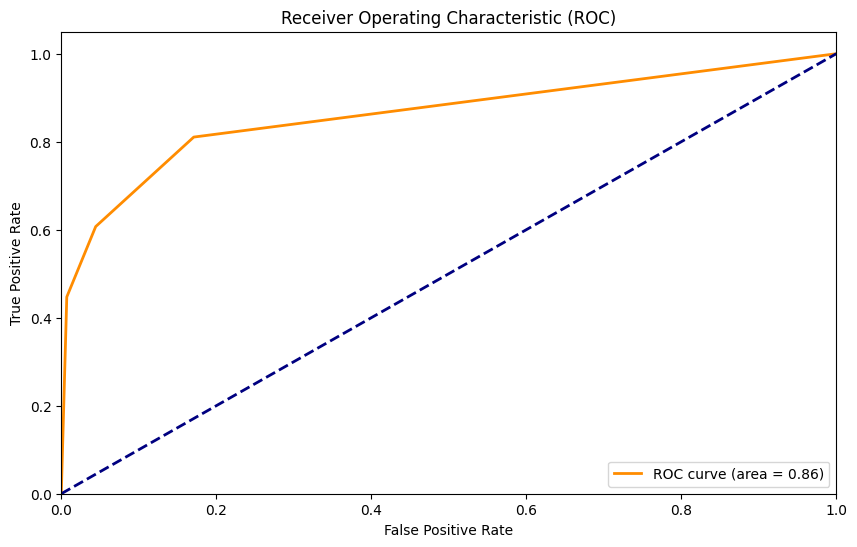

In [73]:
Plot_Auc_Roc_Curve(X_test, y_test)

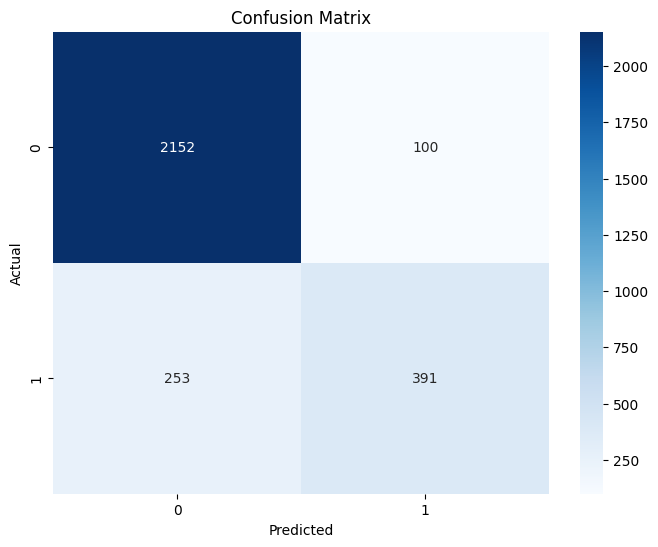

In [74]:
show_confusion_matrix(y_test, y_test_pred)

In [75]:
from sklearn.naive_bayes import GaussianNB

X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

# Calculate evaluation metrics for test data (you can keep this part as is)
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.9926701696297896
Test Precision: 0.6277571885193882
Test Recall: 0.7356895303062445
Test F1 Score: 0.6653687253258099
Test AUC ROC: 0.7356895303062445
time:  0.4759342670440674


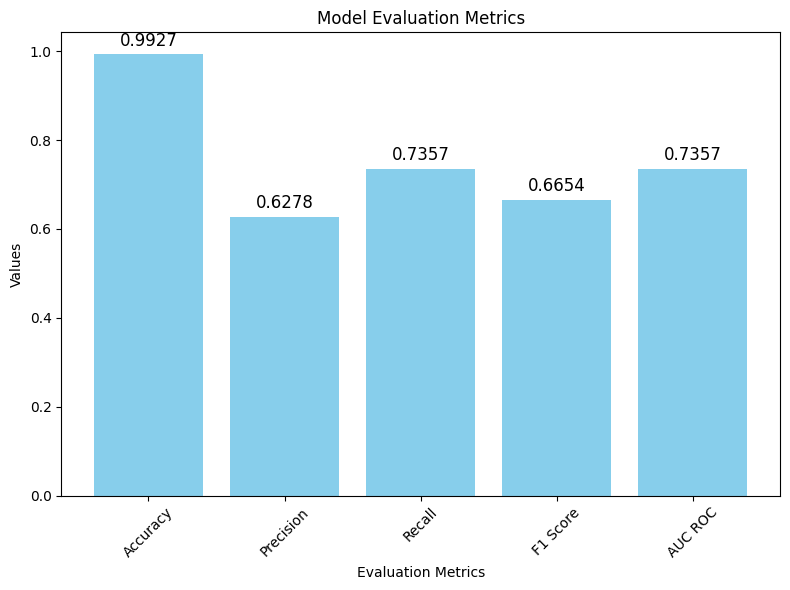

In [76]:
evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

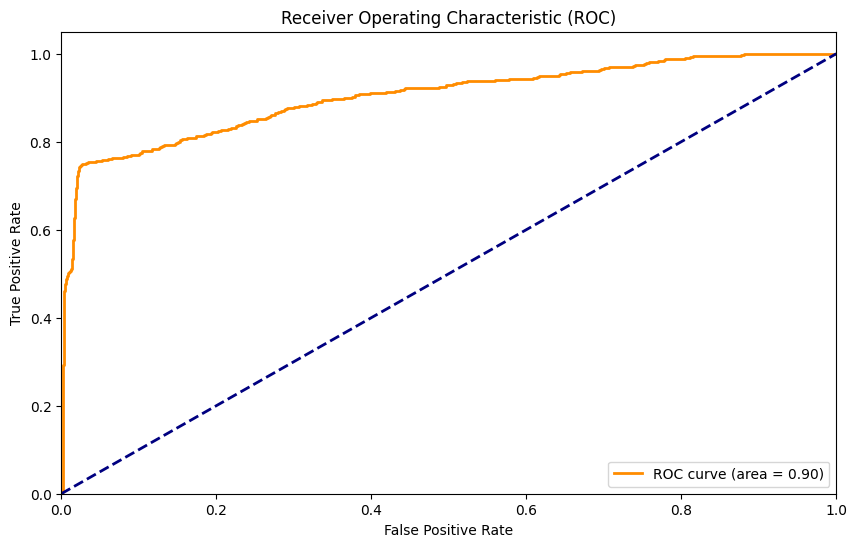

In [77]:
Plot_Auc_Roc_Curve(X_test, y_test)

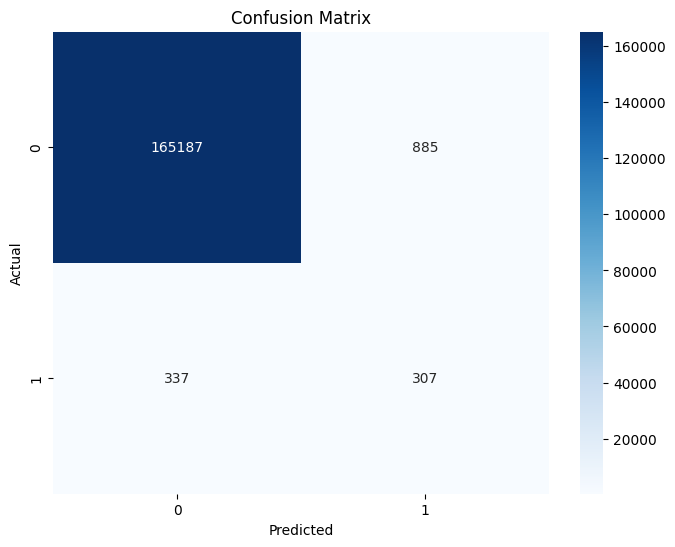

In [78]:
show_confusion_matrix(y_test, y_test_pred)

In [79]:
from sklearn.naive_bayes import GaussianNB

fraud_dataSet = df[df.is_fraud == 1]
legit_dataSet = df[df.is_fraud == 0]

# building a legit dataset in the length of the frauds (7506), so it will be 7506 frauds and 7506 legits
legit_sample = legit_dataSet.sample(n=7506) #7506

# concatenating the two legit(7506) and fraud(7506) datasets(15012)
new_dataset = pd.concat([legit_sample,fraud_dataSet], axis=0)
X = df.drop(columns='is_fraud',axis=1)
y = df['is_fraud']

Start_Time = time()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)
End_Time = time()

# Calculate evaluation metrics for test data (you can keep this part as is)
test_accuracy, test_precision, test_recall, test_f1, test_auc_roc = calculate_evaluation_metrics(y_test, y_test_pred)

#Printing the evaluation metrics
print_evaluation_metrics(test_accuracy, test_precision, test_recall, test_f1, test_auc_roc)

print('time: ', End_Time-Start_Time)

Test Accuracy: 0.9926701696297896
Test Precision: 0.6277571885193882
Test Recall: 0.7356895303062445
Test F1 Score: 0.6653687253258099
Test AUC ROC: 0.7356895303062445
time:  0.4533250331878662
